In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# 模拟一批图像的输出（假设 batch_size=8, 有5个属性）
logits = torch.randn(8, 5)  # 模拟 SwinFace 最后一层的线性输出
print("Logits:\n", logits)

# 应用 sigmoid 激活，得到预测概率
probs = torch.sigmoid(logits)
print("\nSigmoid probabilities:\n", probs)


Logits:
 tensor([[-1.4907, -1.7675,  0.8180,  0.0758,  0.9724],
        [ 0.9688, -2.8691,  0.2705,  1.1119, -1.0391],
        [-0.0270, -2.7072,  0.0392,  0.6716, -1.4420],
        [-0.8545, -2.1167,  0.2518,  2.8900,  0.3135],
        [-0.4437,  1.3710,  0.2154, -0.6903, -0.8113],
        [ 1.0499, -0.5719, -0.8536,  0.2196, -1.0477],
        [ 0.5215,  0.9585, -1.1736,  0.1684, -1.7700],
        [-0.8260, -0.6403, -0.3144,  0.6872,  1.0370]])

Sigmoid probabilities:
 tensor([[0.1838, 0.1459, 0.6938, 0.5189, 0.7256],
        [0.7249, 0.0537, 0.5672, 0.7525, 0.2613],
        [0.4933, 0.0625, 0.5098, 0.6619, 0.1912],
        [0.2985, 0.1075, 0.5626, 0.9473, 0.5777],
        [0.3909, 0.7975, 0.5536, 0.3340, 0.3076],
        [0.7407, 0.3608, 0.2987, 0.5547, 0.2597],
        [0.6275, 0.7228, 0.2362, 0.5420, 0.1455],
        [0.3045, 0.3452, 0.4220, 0.6653, 0.7383]])


In [3]:
# 方法1：Sigmoid Margin（|p - 0.5| × 2）
# Sigmoid margin 置信度（越接近 0 或 1 越高）
sigmoid_margin_conf = torch.abs(probs - 0.5) * 2
print("\nSigmoid margin confidence:\n", sigmoid_margin_conf)



Sigmoid margin confidence:
 tensor([[0.6324, 0.7083, 0.3876, 0.0379, 0.4512],
        [0.4498, 0.8926, 0.1344, 0.5050, 0.4773],
        [0.0135, 0.8749, 0.0196, 0.3237, 0.6175],
        [0.4030, 0.7850, 0.1252, 0.8947, 0.1555],
        [0.2183, 0.5951, 0.1073, 0.3320, 0.3848],
        [0.4815, 0.2784, 0.4027, 0.1093, 0.4807],
        [0.2550, 0.4456, 0.5276, 0.0840, 0.7089],
        [0.3910, 0.3096, 0.1559, 0.3307, 0.4765]])


In [4]:
# 方法2：Logit Margin（|logit|）
# Logit margin 置信度（表示离决策边界的距离）
logit_margin_conf = torch.abs(logits)
print("\nLogit margin confidence:\n", logit_margin_conf)



Logit margin confidence:
 tensor([[1.4907, 1.7675, 0.8180, 0.0758, 0.9724],
        [0.9688, 2.8691, 0.2705, 1.1119, 1.0391],
        [0.0270, 2.7072, 0.0392, 0.6716, 1.4420],
        [0.8545, 2.1167, 0.2518, 2.8900, 0.3135],
        [0.4437, 1.3710, 0.2154, 0.6903, 0.8113],
        [1.0499, 0.5719, 0.8536, 0.2196, 1.0477],
        [0.5215, 0.9585, 1.1736, 0.1684, 1.7700],
        [0.8260, 0.6403, 0.3144, 0.6872, 1.0370]])


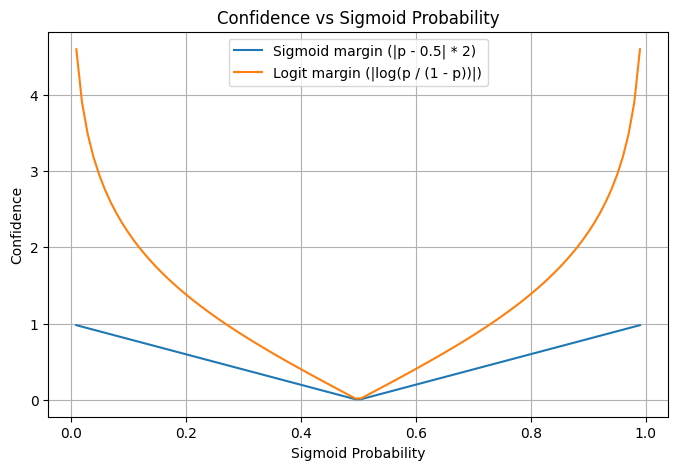

In [5]:
# sigmoid(p) 范围从 0.01 到 0.99
p_vals = torch.linspace(0.01, 0.99, 100)
sigmoid_margin = torch.abs(p_vals - 0.5) * 2
logit_margin = torch.abs(torch.log(p_vals / (1 - p_vals)))

plt.figure(figsize=(8,5))
plt.plot(p_vals, sigmoid_margin, label="Sigmoid margin (|p - 0.5| * 2)")
plt.plot(p_vals, logit_margin, label="Logit margin (|log(p / (1 - p))|)")
plt.xlabel("Sigmoid Probability")
plt.ylabel("Confidence")
plt.title("Confidence vs Sigmoid Probability")
plt.grid(True)
plt.legend()
plt.show()
